# Articial Intelligence and Machine Learning - Coursework 1 - 1st diet
## Modified Chinese-Medicine-163 image dataset
# Student Name: Muhammad Salman Razzaq
# Student Email: mrazza300@caledonian.ac.uk
# Student ID: S2379586

I confirm that the material contained within the submitted coursework is all my own work unless otherwise stated below.

---

## 1. Introduction and problem definition
## Overview of the Dataset
This coursework task requires us to create an image classifier using a dataset of Chinese herbs. The dataset includes 11 types of  herbs, each with around 1550 images. The images are divided in different folders named after their respective categories, and the purpose is to assign each image to one of the 11 herb types.

### The classes included in the dataset are:

* Smoked_Plum
* Schisandra_Berry
* Oyster_Shell
* Lily_Bulb
* Honeysuckle_Flower
* Hawthorn
* Dried_Mulberry
* Ginseng
* Dried_Ginger
* Cornus_Fruit
* Cordyceps
### Problem Statement
The major goal of this course is to create a CNN that can correctly classify images of Chinese herbs into one of 11 categories.This involves some steps follow as:<br>

`Data Ingestion` involves properly loading and preparing an image dataset for model training.<br>
`Baseline Model` Development: Create a baseline CNN model to classify images.<br>
`Enhancing Model` Performance:* Improving the accuracy and generalization of the model utilizing numerous strategies, such as:<br>
`Data augmentation` is the process of artificially increasing the amount of a dataset to prevent overfitting.<br>
`Hyperparameter` tuning involves altering parameters such as the learning rate, batch size, and number of epochs.<br>
`Model architecture` advancements include experimenting with more complex CNN architectures.<br>
`Model evaluation` involves assessing the model's performance on the test set using evaluation measures such as:<br>
- **Accuracy**
- **Precision**
- **Recall**
- **F1-score**
- **Confusion matrix**



### Module Imports
In this section, we import the major libraries and modules required for the project. These libraries are used for many activities, including data preprocessing, model development, training, evaluation, and visualization.

#### **Key Libraries**:
- **TensorFlow and Keras**:
    - Used to create and train a Convolutional Neural Network (CNN) for the classification of Chinese herbal pictures.
    - Layers like as `Conv2D`, `MaxPooling2D`, and `Dense` are used to form the CNN architecture.
    - Utilities such as `ImageDataGenerator` are used to enhance the training dataset and increase generalization.
    - The `Adam` optimizer reduces the loss function while training.

- **Matplotlib and Seaborn**:
    - Used to visualize training/validation metrics (accuracy and loss) as well as the confusion matrix.

- **NumPy**:
  - Manages numerical operations and image data as arrays.

- **Scikit-Learn**:
  - Divides the dataset into training, validation, and testing sets.
  - Evaluation metrics include classification reports and confusion matrices.


In [ ]:
# Import necessary libraries
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split




## 2. Data Loading, Exploration, and Visualization

These steps involves adding the dataset and doing first exploratory tasks:

1. **Loading the Dataset**: 
- Load the dataset from the selected base directory. The categories (or classes) of Chinese herbs are listed to ensure that the dataset is properly organised.

2. **Counting photographs per Category**: 
- Calculate and print the number of photographs for each category. This aids in identifying any imbalances in the dataset.

3. **Visualizing Sample photographs**: 
- Display two photographs from each category to visualize the dataset and ensure image quality.

These steps ensures that the dataset is accurately loaded and structured.
  - Each category contains sufficient data to train an accurate model.
  - Potential problems, such as class imbalances or low-quality photos, are detected early.




In [ ]:
#path
base_dir = os.path.expanduser('~/Downloads/ChineseHerbs')

In [ ]:
# getting the categories of herbs
categories = os.listdir(base_dir)
print(f"Total categories: {len(categories)}")
print("Categories:", categories)

Total categories: 11
Categories: ['cordyceps', 'cornus_fruit', 'dried_ginger', 'dried_mulberry', 'ginseng', 'hawthorn', 'honeysuckle_flower', 'lily_bulb', 'oyster_shell', 'schisandra_berry', 'smoke_plum']


In [ ]:
# Count number of total images per category
category_counts = {}
for category in categories:
    category_path = os.path.join(base_dir, category)
    category_counts[category] = len(os.listdir(category_path))

for category, count in category_counts.items():
    print(f"{category}: {count} images")

cordyceps: 1564 images
cornus_fruit: 1562 images
dried_ginger: 1566 images
dried_mulberry: 1566 images
ginseng: 1741 images
hawthorn: 1559 images
honeysuckle_flower: 1554 images
lily_bulb: 1565 images
oyster_shell: 1564 images
schisandra_berry: 1568 images
smoke_plum: 1557 images


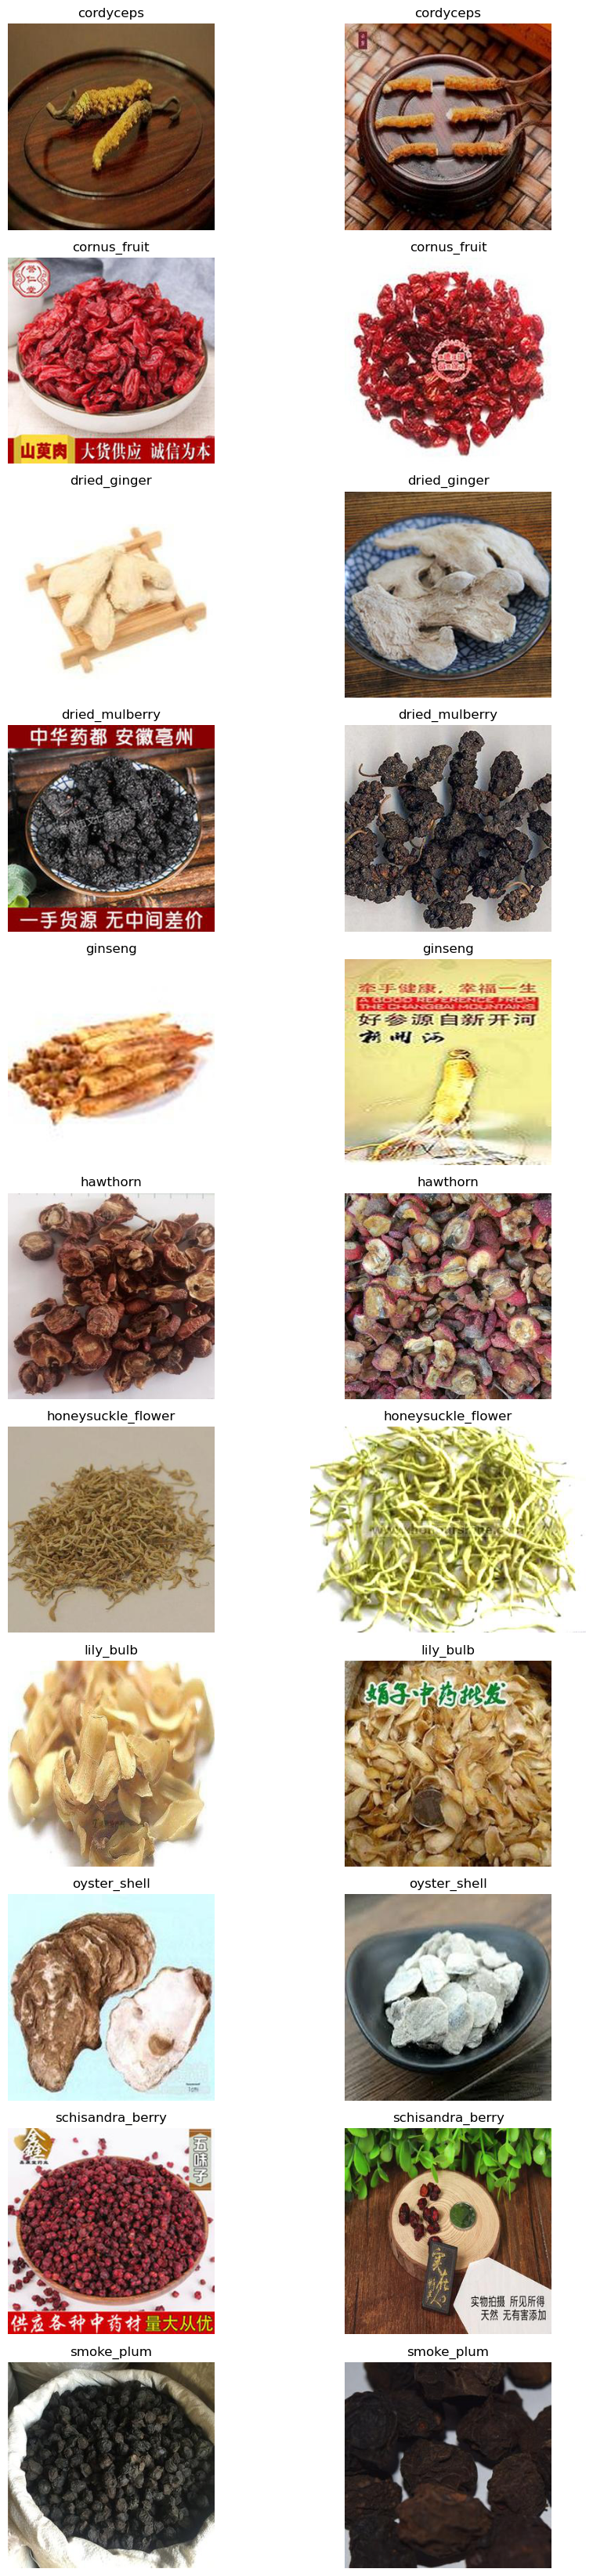

In [32]:
# Displaying sample images from each category
def display_sample_images(base_dir, categories):
    fig, axes = plt.subplots(len(categories), 2, figsize=(10, len(categories) * 3))
    for i, category in enumerate(categories):
        category_path = os.path.join(base_dir, category)
        sample_images = os.listdir(category_path)[:2]
        for j, img_name in enumerate(sample_images):
            img_path = os.path.join(category_path, img_name)
            img = plt.imread(img_path)
            axes[i, j].imshow(img)
            axes[i, j].set_title(category)
            axes[i, j].axis("off")
    plt.tight_layout()
    plt.show()

display_sample_images(base_dir, categories)

### Data preparation
This section prepares the dataset for training.

1. **Image Loading and Resizing**: 
    - Images are downsized to **150x150 pixels** to ensure fixed input dimensions for the CNN.

2. **Normalization**: 
    - Pixel values are scaled to [0, 1] for faster training and better resolution.

3. **Label Assignment**: 
    - Numeric labels are assigned based on the category index.

4. **Conversion to NumPy Arrays**: 
    - Images and labels are converted to NumPy arrays for faster processing.

#### **Output**: 
- Total number of photos and dimensions.
- The total number of related labels.



In [75]:
images = []
labels = []

# Looping through every class folder(category) and load images
for class_name in categories:
    class_path = os.path.join(base_dir, class_name)
    
    if os.path.isdir(class_path):  
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = image.load_img(img_path, target_size=(150, 150))  # Resizing to 150x150 
            img_array = image.img_to_array(img) / 255.0  # Normalizing images in loop to [0, 1]
            
            images.append(img_array)
            labels.append(categories.index(class_name))  # Label will be the its index of the class in categories

# Changing images and labels to arrays (numpy array)
images = np.array(images)
labels = np.array(labels)

print(f"Total images: {len(images)}")
print(f"Image shape: {images[0].shape}")
print(f"Total labels: {len(labels)}")


Total images: 17366
Image shape: (150, 150, 3)
Total labels: 17366


# TASK 1: Develop a Baseline CNN Model

### Data Splitting and Label Encoding

This process prepares data for training, validation, and testing by: 1. **Splitting the dataset**:
   - The dataset is separated into:
     - **Training Set (70%)**: Used to train the model.
     - **Validation Set (15%)**: Used to assess the model during training and adjust hyperparameters.
     - **Test Set (15%)**: Used to assess the final model's performance following training.
   - `train_test_split` is used with classification to keep the class distribution stable across splits.

2. **One-Hot Encoding**: 
- Labels are encoded as a binary vector. This is necessary for multiclass classification.

3. **Verification**: 
- Print the shapes of the training, validation, and test sets to ensure accurate splits.



In [ ]:
# Spliting our dataset into  3 sets training (70%), validation (15%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42, stratify=labels)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# it will change labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=len(categories))
y_val = to_categorical(y_val, num_classes=len(categories))
y_test = to_categorical(y_test, num_classes=len(categories))

# Printing dataset shapes to verify splits works or not
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Validation set shape: {X_val.shape}, {y_val.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")


Training set shape: (12156, 150, 150, 3), (12156, 11)
Validation set shape: (2605, 150, 150, 3), (2605, 11)
Test set shape: (2605, 150, 150, 3), (2605, 11)


## 3. Define a basic CNN model

### Developing the Baseline CNN Model

This section creates the baseline Convolutional Neural Network (CNN) model using the following architecture:
1) **Convolutional Layers**:
   - Two convolutional blocks are employed to extract spatial characteristics from the images.
   - Each block has a 'Conv2D' layer followed by a 'MaxPooling2D' layer that reduces spatial dimensions.

2. **Flattening**: 
    - Flatten the feature maps into a one-dimensional array to connect to the fully connected layer.

3. **Fully Connected Layer**: 
    - A dense layer of 128 neurons with ReLU activation is added for non-linear transformation.
    - Dropout is used in regularization to avoid overfitting.

4. **Output Layer**: 
    - The final layer employs a'softmax' activation function to generate probability for all 11 categories.

 ---   
### Compiling the Baseline Model

The model is built with: 
1. **Optimizer**
   - The `Adam` optimizer is employed with a learning rate of 0.001 to achieve efficient training and adjustable learning rates.

2. **Loss Function**: 
    - `categorical_crossentropy` is the loss function for multi-class classification.

3. *Evaluation Metrics**:
   - The term `accuracy` refers to the proportion of samples correctly identified throughout training and validation.



In [ ]:
model = Sequential([
    # First convolutional block or layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    # 2nd
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    # Flatten the feature maps
    Flatten(),
    
    # fully connected layer final layer
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout for regularization
    
    # Output layer
    Dense(len(categories), activation='softmax')  # Output layer for multi-class classification
])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 82944)             0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [ ]:
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
    loss='categorical_crossentropy',                         
    metrics=['accuracy']                                     
)



### Training the Baseline Model.

The model is trained with the `fit` method:
1) **Inputs**:
    - Training data `('X_train' and 'y_train')` and validation data `('X_val' and 'y_val')` are available for training and real-time evaluation.

2. **Epochs and Batch Size**: 
    - The model trains for 20 epochs with a batch size of 32, resulting in 32 samples processed before updating the model weights.

3. **Verbose Output**: 
    - Each `epochs` progress is displayed, including training and validation accuracy and loss.


In [ ]:
# Training our baselin model
history = model.fit(
    X_train, y_train,          
    validation_data=(X_val, y_val),  
    epochs=20,                 
    batch_size=32,             
    verbose=1                  
)

Epoch 1/20
380/380 [==============================] - 130s 337ms/step - loss: 1.7026 - accuracy: 0.3995 - val_loss: 1.1084 - val_accuracy: 0.6119
Epoch 2/20
380/380 [==============================] - 118s 309ms/step - loss: 1.0933 - accuracy: 0.6004 - val_loss: 0.8357 - val_accuracy: 0.7171
Epoch 3/20
380/380 [==============================] - 143s 375ms/step - loss: 0.7907 - accuracy: 0.7196 - val_loss: 0.7359 - val_accuracy: 0.7367
Epoch 4/20
380/380 [==============================] - 166s 436ms/step - loss: 0.5721 - accuracy: 0.7983 - val_loss: 0.6766 - val_accuracy: 0.7785
Epoch 5/20
380/380 [==============================] - 177s 465ms/step - loss: 0.4363 - accuracy: 0.8478 - val_loss: 0.5763 - val_accuracy: 0.8180
Epoch 6/20
380/380 [==============================] - 151s 397ms/step - loss: 0.3117 - accuracy: 0.8946 - val_loss: 0.5684 - val_accuracy: 0.8269
Epoch 7/20
380/380 [==============================] - 177s 466ms/step - loss: 0.2537 - accuracy: 0.9112 - val_loss: 0.6278 -

## 4. Model evaluation
### Model Evaluation in Test Set

The next step evaluates the model's performance on the unseen test dataset:

- **Test Loss**: Indicates how well the model performs on the test data using the loss function.
- **Test Accuracy**: Measures the proportion of correctly identified samples in the test dataset.
---
### Training and Validation Plots

The next section shows the model's performance throughout training:

1. **Accuracy Plot**: 
    - Shows training and validation accuracy over epochs.
   - An increasing trend in validation accuracy suggests that the model is learning efficiently.

2. **Loss Plot**: 
    - Displays training and validation loss over epochs.
   - A decreasing trend in validation loss shows that the model is improving rather than overfitting.
---
### Saving the Trained Model

The trained model *herbs_classification_cnn_model_msr.h5* is saved as an `.h5` file using TensorFlow's `model.save()` function. This allows the model to be reloaded later without retraining.







In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)  # Evaluating  the model on the test set
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


82/82 [==============================] - 6s 69ms/step - loss: 0.8464 - accuracy: 0.8403
Test Loss: 0.8464341163635254, Test Accuracy: 0.8403071165084839


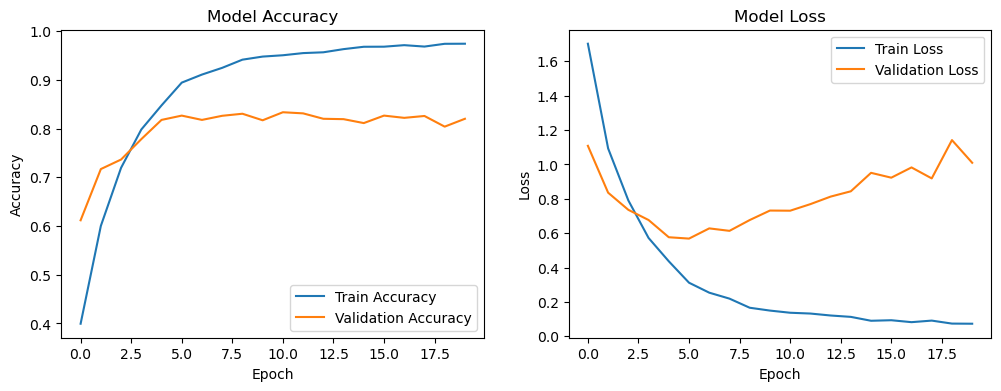

In [ ]:

# Ploingt training & validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Ploting training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
# Saving model
model.save('herbs_classification_cnn_model_msr.h5')


### Testing the Model with a Single Image.

This section shows how to use the trained model for prediction on a single image.

1. **Load and Preprocess**: 
   - Resize image to 150x150 pixels and normalize to match training data preprocessing.

2. **Prediction**: 
   - The model predicts class probabilities based on the input image.
   - The class with the greatest likelihood is chosen as the anticipated class.



In [ ]:
# Loading image for testing
test_img_path = 'C:/Users/salma/Downloads/ChineseHerbs/lily_bulb/lily_bulb (1014).jpg'
img = image.load_img(test_img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0) 

# Predicting class
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)
print(f"Predicted Class: {categories[predicted_class[0]]}")


1/1 [==============================] - 0s 22ms/step
Predicted Class: lily_bulb


# TASK 2: Enhance Model Performance
### Developing the Enhanced CNN Model

This improved model makes the following modifications to the baseline architecture:

1. **Batch Normalization**: 
    - Apply after each convolutional layer to normalize activations and enhance training stability.

2. **Additional Convolutional Block**: 
    - A 128-filter third convolutional block is introduced for deeper feature extraction.

3. **Increased Neurons** in Fully Connected Layer: 
    - The dense layer now has 256 neurons, enabling the model to detect more complicated patterns.

4. **Dropout**:
    - Regularization is used with a 50% dropout rate to prevent overfitting.

**Purpose**: These changing attempt to increase the model's capacity to learn complex characteristics and generalize to new data.



## 5. Enhance the baseline model

In [ ]:
# Building the enhanced CNN model
enhanced_model = Sequential([
    # First convolutional layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)), 
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    #2nd
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    # 3rd
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    # Flatten and fully connected layers
    Flatten(),
    Dense(256, activation='relu'),  # Increasing number of neurons
    Dropout(0.5),
    Dense(len(categories), activation='softmax')  # Output layer
])



### Compiling the Enhanced Model

The enhanced model is compiled with:
1. **Optimizer**:
   - A lower learning rate of `0.0001` is used for finer adjustments to weights.
2. **Loss Function**:
   - Categorical Crossentropy remains the loss function for multi-class classification.
3. **Metrics**:
   - Accuracy is used to monitor performance during training.


In [ ]:
# Compiling the enhanced model
enhanced_model.compile(
    optimizer=Adam(learning_rate=0.0001),  # Smaller learning rate for better fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


### Training the Enhanced Model

The model is trained with: 
1. **Increased Epochs**: 
    - The training length is extended to 25 epochs to allow the deeper architecture to converge.

2. **Batch Size**: 
    - Maintaining a batch size of 32 ensures consistent and efficient gradient changes.

3. **Validation Data**: 
    - Real-time validation ensures model performance and prevents overfitting.


In [ ]:
# Train the enhanced model
history_enhanced = enhanced_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=25,  # Increasing number of epochs to allow deeper learning
    batch_size=32,
    verbose=1
)

Epoch 1/25
380/380 [==============================] - 213s 558ms/step - loss: 1.5636 - accuracy: 0.4729 - val_loss: 2.8997 - val_accuracy: 0.2338
Epoch 2/25
380/380 [==============================] - 210s 553ms/step - loss: 0.9565 - accuracy: 0.6600 - val_loss: 0.7506 - val_accuracy: 0.7363
Epoch 3/25
380/380 [==============================] - 212s 558ms/step - loss: 0.6722 - accuracy: 0.7616 - val_loss: 0.5407 - val_accuracy: 0.8173
Epoch 4/25
380/380 [==============================] - 207s 546ms/step - loss: 0.4865 - accuracy: 0.8262 - val_loss: 0.5449 - val_accuracy: 0.8223
Epoch 5/25
380/380 [==============================] - 208s 548ms/step - loss: 0.3586 - accuracy: 0.8730 - val_loss: 0.4696 - val_accuracy: 0.8434
Epoch 6/25
380/380 [==============================] - 206s 543ms/step - loss: 0.2814 - accuracy: 0.8997 - val_loss: 0.4795 - val_accuracy: 0.8534
Epoch 7/25
380/380 [==============================] - 206s 542ms/step - loss: 0.2007 - accuracy: 0.9298 - val_loss: 0.5005 -

## 6. Model evaluation
### Evaluate Baseline and Enhanced Models

1. **Baseline Model**: 
    - Evaluate the baseline model's test loss and accuracy as a reference for future improvements.

2. **Enhanced Model**: 
    - Evaluate the enhanced model to see if architectural enhancements lead to more generalization.

In [68]:
# Evaluate baseline model
baseline_test_loss, baseline_test_accuracy = model.evaluate(X_test, y_test)
print(f"Baseline Model - Test Loss: {baseline_test_loss}, Test Accuracy: {baseline_test_accuracy}")

# Evaluate enhanced model
enhanced_test_loss, enhanced_test_accuracy = enhanced_model.evaluate(X_test, y_test)
print(f"Enhanced Model - Test Loss: {enhanced_test_loss}, Test Accuracy: {enhanced_test_accuracy}")



82/82 [==============================] - 5s 59ms/step - loss: 0.8464 - accuracy: 0.8403
Baseline Model - Test Loss: 0.8464341163635254, Test Accuracy: 0.8403071165084839
82/82 [==============================] - 9s 107ms/step - loss: 0.7301 - accuracy: 0.8699
Enhanced Model - Test Loss: 0.7301208972930908, Test Accuracy: 0.8698656558990479


### Test Results: Baseline vs Enhanced Model
#### **Baseline Model**: 
- **Test Loss**: `0.8464` 
    - Measures the error between predicted and true labels on the test set.
- **Test Accuracy**: `84.03%` 
    - The baseline model accurately categorized 84% of the test images.

#### **Enhanced Model**: 
- **Test Loss**: `0.7301` 
    - Lower test loss relative to baseline model, suggesting enhanced performance.
- **Test Accuracy**: `86.99%` 
    - The upgraded model exceeds the baseline model with approximately 87% accuracy on the test set.

#### **A Comparison**:
1. When compared to the baseline model, the upgraded model improves accuracy by 3% and reduces test loss significantly.
2. Improvements such as batch normalization and additional layers help to improve feature extraction and generalization.
3. The better performance illustrates the effectiveness of the architectural modifications implemented in the updated model.




In [69]:
# Comparison of test results
print("\nComparison of Model Performance on Test Set:")
print(f"{'Model':<15}{'Test Loss':<15}{'Test Accuracy':<15}")
print(f"{'Baseline':<15}{baseline_test_loss:<15.4f}{baseline_test_accuracy:<15.4f}")
print(f"{'Enhanced':<15}{enhanced_test_loss:<15.4f}{enhanced_test_accuracy:<15.4f}")



Comparison of Model Performance on Test Set:
Model          Test Loss      Test Accuracy  
Baseline       0.8464         0.8403         
Enhanced       0.7301         0.8699         


### Model Accuracy and Loss Comparison
1. **Accuracy Comparison**: Plots show training and validation accuracy for both models.
   - The trends demonstrate how well the models learn and generalize throughout training.

2. **Loss Comparison**: The training and validation loss for both models are plotted.
   - A smaller validation loss and a closer match between training and validation loss indicate less overfitting and greater generalization.

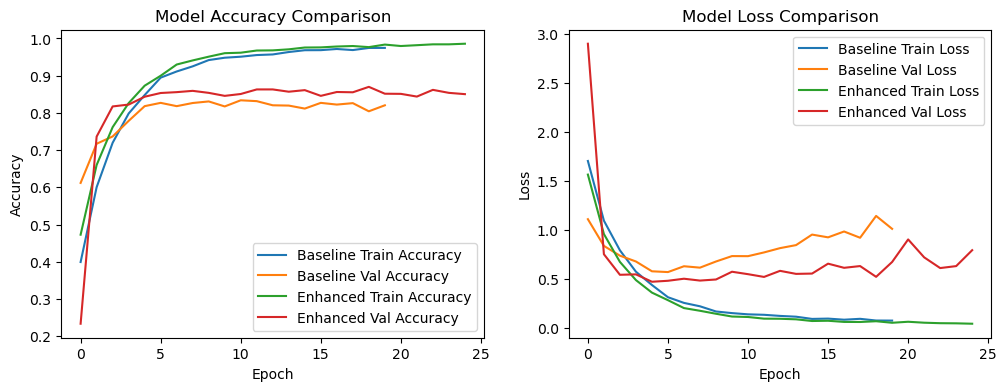

In [59]:
# Plot training & validation accuracy for baseline and enhanced models
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Baseline Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Baseline Val Accuracy')
plt.plot(history_enhanced.history['accuracy'], label='Enhanced Train Accuracy')
plt.plot(history_enhanced.history['val_accuracy'], label='Enhanced Val Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss for baseline and enhanced models
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Baseline Train Loss')
plt.plot(history.history['val_loss'], label='Baseline Val Loss')
plt.plot(history_enhanced.history['loss'], label='Enhanced Train Loss')
plt.plot(history_enhanced.history['val_loss'], label='Enhanced Val Loss')
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


### Classification Report amoung both models Baseline and Enhanced
The classification report contains precise stats for each class, including:
- **Precision**: the number of accurately predicted positive samples among all expected positive samples.
- **Recall**: The fraction of accurately expected positive samples among all actual positive samples.
- **F1-Score**: The harmonic mean of precision and recall yields a single performance statistic for each class.
- **Support**: The amount of true samples per class.
- Confusion Matrix: The confusion matrices give a detailed picture of the model's performance,<br>


This analysis will help us to identify which classes the model performs well on and where it struggles


In [ ]:

# Predictions of the Baseline Model
y_pred_baseline = model.predict(X_test)
y_pred_baseline_classes = np.argmax(y_pred_baseline, axis=1)

# predictions for Enhanced Model
y_pred_enhanced = enhanced_model.predict(X_test)
y_pred_enhanced_classes = np.argmax(y_pred_enhanced, axis=1)

# Labels(only true ones)
y_true = np.argmax(y_test, axis=1)

# printing Classification Report of our Baseline Model
print("Classification Report - Baseline Model")
print(classification_report(y_true, y_pred_baseline_classes, target_names=categories))

# printing Classification Report of our Enhanced Model
print("\nClassification Report - Enhanced Model")
print(classification_report(y_true, y_pred_enhanced_classes, target_names=categories))


82/82 [==============================] - 18s 214ms/step
Classification Report - Baseline Model
                    precision    recall  f1-score   support

         cordyceps       0.91      0.81      0.86       235
      cornus_fruit       0.85      0.94      0.89       234
      dried_ginger       0.84      0.71      0.77       235
    dried_mulberry       0.76      0.83      0.79       235
           ginseng       0.81      0.75      0.78       261
          hawthorn       0.98      0.85      0.91       234
honeysuckle_flower       0.88      0.97      0.92       233
         lily_bulb       0.71      0.94      0.81       235
      oyster_shell       0.91      0.82      0.86       235
  schisandra_berry       0.88      0.80      0.84       235
        smoke_plum       0.79      0.83      0.81       233

          accuracy                           0.84      2605
         macro avg       0.85      0.84      0.84      2605
      weighted avg       0.85      0.84      0.84      2605


C

### Observations:
1. The revised model increases overall accuracy from approx **84%** to **87%.**
2. There are significant advances in classes such as **Lily Bulb** and **Schisandra Berry**.
3. Precision for **Oyster Shell** declined, but recall increased, indicating that more fine-tuning may be beneficial.
4. The revised model exhibits improved overall and weighted averages, indicating more consistent performance across all classes.
---
### Confusion matrix of  `Both models` 

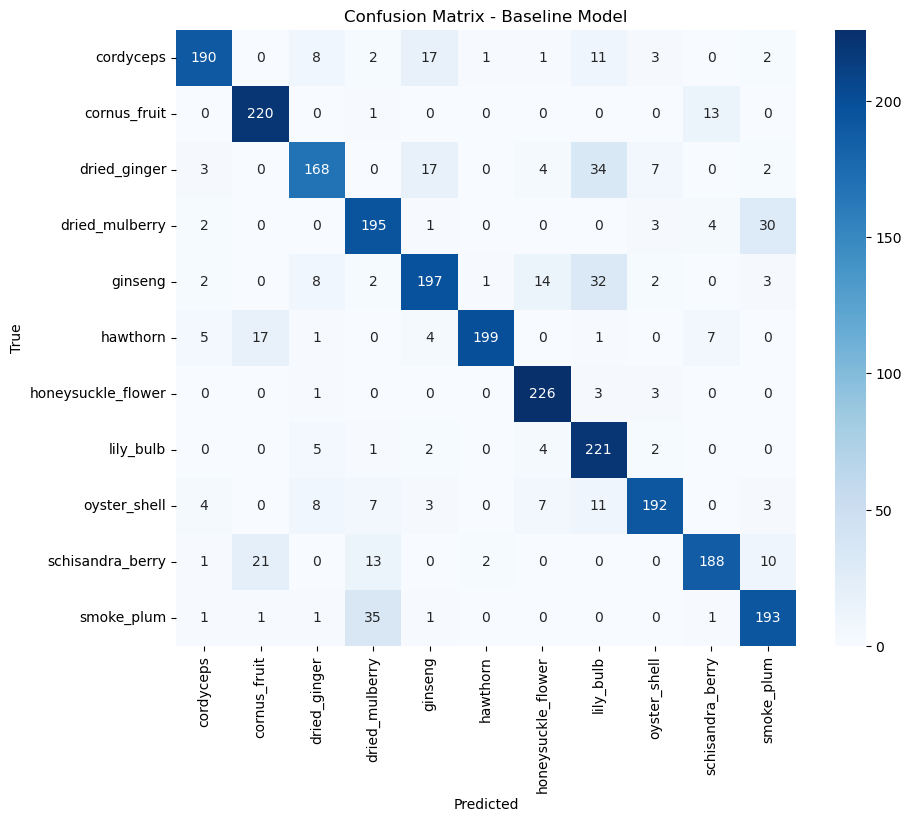

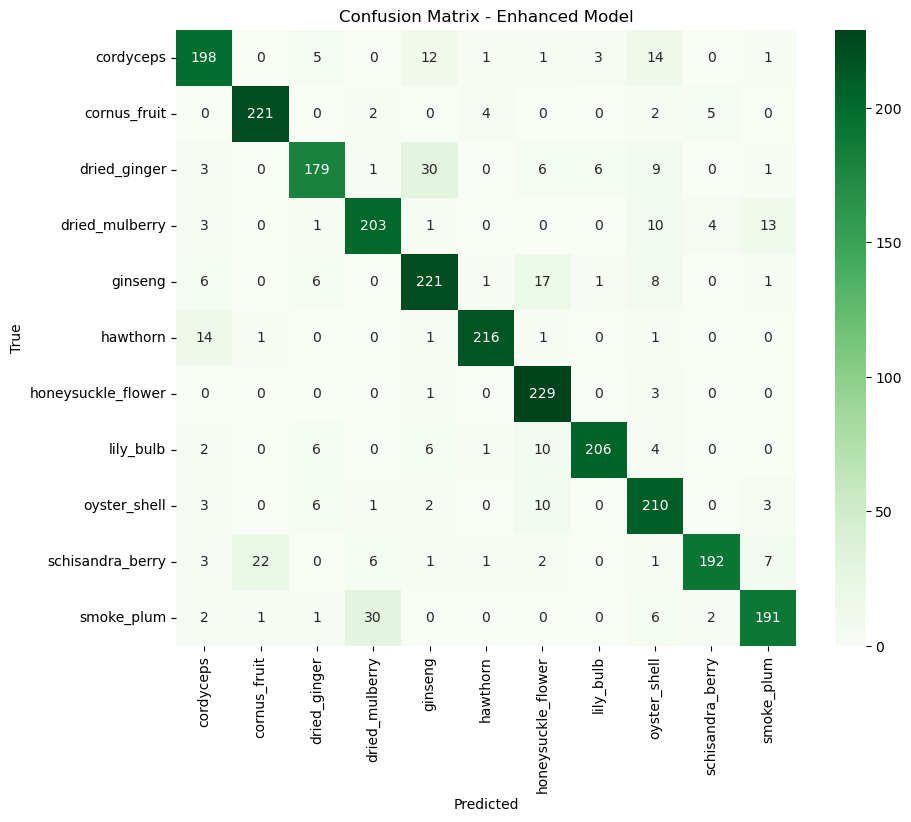

In [ ]:
#confusion matrix of normal baseline model
cm_baseline = confusion_matrix(y_true, y_pred_baseline_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_baseline, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.title("Confusion Matrix - Baseline Model")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Confusion matrix of enhanced model
cm_enhanced = confusion_matrix(y_true, y_pred_enhanced_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_enhanced, annot=True, fmt='d', cmap='Greens', xticklabels=categories, yticklabels=categories)
plt.title("Confusion Matrix - Enhanced Model")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

### Confusion Matrices Of Baseline Model vs Enhanced Model
1. **Baseline Model**: 
- The baseline model performs well in classes like "Honeysuckle Flower" and "Hawthorn". 
- However, there are considerable incorrect classifications between "Dried Ginger" and "Hawthorn", as well as "Smoke Plum" and "Dried Mulberry".

2. **Enhanced Model**: 
- Improves classification accuracy and reduces incorrect classifications significantly.
     - "Dried Mulberry" verses "Smoke Plum" .
     - "Schisandra Berry" verses "Cornus Fruit" .


#### Importance of Confusion Matrix:
The confusion matrices give a detailed picture of the model's performance, emphasizing specific areas where the upgraded model outperforms the baseline and where further improvements are required.




In [ ]:
# Saving the enhanced model
enhanced_model.save('enhanced_herbs_classification_cnn_model_msr.h5')
print("Enhanced model saved")


Enhanced model saved


### Testing the Model with a Single Image.

In [ ]:
# Loading an image for testing
test_img_path = 'C:/Users/salma/Downloads/ChineseHerbs/ginseng/ginseng (10).jpg'
img = image.load_img(test_img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predicting  the class
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)
print(f"Predicted Class: {categories[predicted_class[0]]}")


1/1 [==============================] - 0s 27ms/step
Predicted Class: ginseng


## 7. Discussion and conclusion
### **Task 1: Baseline Model**
1. **Performance Summary**:
   - The baseline CNN achieved a **test accuracy of 84.03%** and a **test loss of 0.8464**.
   - The model performed well overall but struggled with certain classes that had subtle differences, such as "Schisandra Berry" and "Smoke Plum."

2. **Interpretation**:
   - The model’s simple design with two convolutional layers worked well for extracting basic patterns but fell short in capturing more complex features.
   - Minimal overfitting was observed, as the validation accuracy closely matched the training accuracy. This is likely due to the use of dropout, which helped make the model more robust.

3. **Improvements**:
   - Adding more layers could help the model learn complex details more effectively.
   - Introducing **batch normalization** might improve training stability and speed up learning.

---

### **Task 2: Enhanced Model**
1. **Performance Summary**:
   - The enhanced CNN improved the results, achieving a **test accuracy of 86.99%** and a **test loss of 0.7301**, a clear improvement over the baseline.
   - Improvements in specific categories, like "Lily Bulb" and "Schisandra Berry," were evident from the confusion matrix and classification report.

2. **Impact of Enhancements**:
   - Adding **batch normalization** stabilized the training process and helped produce more consistent results.
   - An additional convolutional block enabled the model to extract finer details, which was especially useful for visually similar classes.
   - Increasing the number of neurons in the fully connected layer improved the model’s ability to capture abstract patterns.

3. **Challenges**:
   - Some classes, such as "Dried Ginger" and "Hawthorn," remained challenging due to similarities in their appearance.
   - The enhanced model required more training time and computational power, highlighting the balance between model complexity and efficiency.

---

### **Overall Findings**
1. **Comparison of Models**:
   - The enhanced model addressed many limitations of the baseline model, achieving higher accuracy and lower loss.
   - Both models performed well considering the dataset’s complexity and the relatively low resolution of the input images (150x150).

2. **Key Takeaways**:
   - Careful tuning of the model architecture, such as adding layers and neurons, plays a significant role in improving performance.
   - Techniques like dropout and batch normalization are vital for reducing overfitting and improving generalization.
   - Ensuring a well-prepared and balanced dataset is essential for achieving reliable and meaningful results.

---

### **Suggestions for Future Improvements**
1. **Expand the Dataset with Augmentation**:
   - Use techniques like rotation, flipping, and zooming to artificially create more training data, making the model more robust.

2. **Leverage Pre-Trained Models**:
   - Try transfer learning with pre-trained models like **ResNet** or **EfficientNet** to benefit from their ability to extract high-level features.

3. **Fine-Tune Hyperparameters**:
   - Perform hyperparameter tuning to optimize settings like learning rate, batch size, and dropout rates.

4. **Explore Advanced Architectures**:
   - Experiment with cutting-edge architectures like **ResNet**, **DenseNet**, or **Vision Transformers**, which often deliver better performance in image classification tasks.

5. **Model Explainability**:
   - Use visualization tools like **Grad-CAM** to understand what the model focuses on when making predictions, which could reveal potential areas for improvement.

---

### **Conclusion**
This project demonstrated how Convolutional Neural Networks (CNNs) can be used to classify Chinese herb images effectively. 
The enhanced model achieved better results than the baseline by incorporating additional layers, batch normalization, and regularization. 
While the performance is promising, further improvements can be made by using advanced architectures, data augmentation, and pre-trained models. 
This project highlights the importance of continuously refining models and experimenting with different techniques to achieve the best results.






--- 
---
---
### Sources:
- TensorFlow: https://www.tensorflow.org/
- Keras: https://keras.io/
- Scikit-Learn: https://scikit-learn.org/
- Matplotlib: https://matplotlib.org/
- Understanding Convolutional Neural Networks (CNNs) for image classification: https://www.youtube.com/watch?v=d9QHNkD_Pos
- Creating a CNN Model for Image Classification with TensorFlow: https://medium.com/@esrasoylu/creating-a-cnn-model-for-image-classification-with-tensorflow-49b84be8c12a
- Image Classification using Convolutional Neural Networks: https://github.com/anubhavparas/image-classification-using-cnn
- Understanding Dropout in Keras: https://stackoverflow.com/questions/46648570/what-is-dropout-in-keras
- Adam Optimizer: https://arxiv.org/abs/1412.6980
- Understanding Batch Normalization: https://towardsdatascience.com/batch-normalization
- Analytics Vidhya: Data science blogs and insights. https://www.analyticsvidhya.com/
- Image Classification using CNN: https://www.geeksforgeeks.org/image-classifier-using-cnn/
- Image classification in frequency domain with 2SReLU: A second harmonics superposition activation function: https://www.sciencedirect.com/science/article/abs/pii/S1568494621007730
- Visualizations: https://scikit-learn.org/stable/visualizations.html
